### Install dependencies

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Position string vector

In [2]:
portfolio_1 = ["GE", "MSFT", "IBM"] # GE, Microsoft

### Test data format

In [3]:
data_test = yf.download("^GSPC", start="2023-06-01", end="2024-01-01").drop(columns=["Volume"])
data_test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2023-05-31,4190.740234,4195.439941,4166.149902,4179.830078,4179.830078
2023-06-01,4183.029785,4232.430176,4171.640137,4221.020020,4221.020020
2023-06-02,4241.009766,4290.669922,4241.009766,4282.370117,4282.370117
2023-06-05,4282.990234,4299.279785,4266.819824,4273.790039,4273.790039
2023-06-06,4271.339844,4288.330078,4263.089844,4283.850098,4283.850098
...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078


### Extract closing price

In [4]:
def clean_data(data):
    data_clean = data.copy()
    for k in data_clean:
        for c in data_clean[k].columns.to_list():
            if not c == "Close":
                data_clean[k] = data_clean[k].drop(columns=[c])
    return data_clean

#### Testing

In [5]:
data_Mp = {"^GSPC": yf.download("^GSPC", start="2023-06-01", end="2024-01-01")}
data_Mp_clean = clean_data(data_Mp)
data_Mp_clean

[*********************100%***********************]  1 of 1 completed


{'^GSPC':                   Close
 Date                   
 2023-05-31  4179.830078
 2023-06-01  4221.020020
 2023-06-02  4282.370117
 2023-06-05  4273.790039
 2023-06-06  4283.850098
 ...                 ...
 2023-12-22  4754.629883
 2023-12-26  4774.750000
 2023-12-27  4781.580078
 2023-12-28  4783.350098
 2023-12-29  4769.830078
 
 [148 rows x 1 columns]}

### Plot prices changes

In [6]:
import matplotlib.pyplot as plt

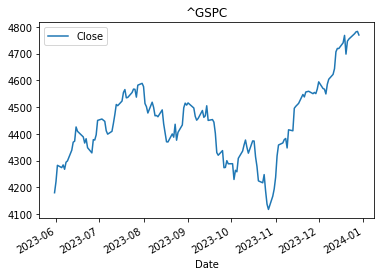

In [7]:
for k in data_Mp_clean:
    data_Mp_clean[k].plot(title=k)

In [9]:
data_Mj = {x:yf.download(x, start="2023-06-01", end="2024-01-01") for x in portfolio_1}
data_Mj_clean = clean_data(data_Mj)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


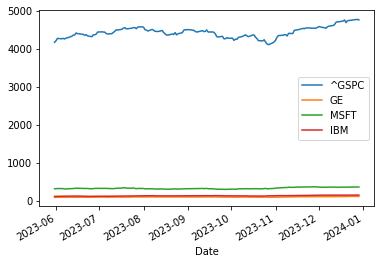

In [10]:
lege=[]
ax = list(data_Mp_clean.values())[0].plot()
lege.append(list(data_Mp_clean.keys())[0])
for k in data_Mj_clean:
    data_Mj_clean[k].plot(ax=ax)
    lege.append(k)
ax.legend(lege)
# for k in data_Mj_clean:
#     data_Mj_clean[k].plot(title=k)

In [12]:
data_Rf = {"^IRX":yf.download("^IRX", start="2023-06-01", end="2024-01-01")}
data_Rf_clean = clean_data(data_Rf)
data_Rf_clean

[*********************100%***********************]  1 of 1 completed


{'^IRX':             Close
 Date             
 2023-05-31  5.248
 2023-06-01  5.203
 2023-06-02  5.215
 2023-06-05  5.143
 2023-06-06  5.158
 ...           ...
 2023-12-22  5.208
 2023-12-26  5.203
 2023-12-27  5.235
 2023-12-28  5.218
 2023-12-29  5.180
 
 [147 rows x 1 columns]}

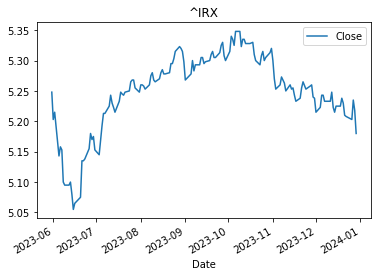

In [17]:
for k in data_Rf_clean:
#     print(data_Rf_clean[k].columns.to_list())
    data_Rf_clean[k].plot(title=k)

### Computing log daily return

In [11]:
def log_return(data, p_v=None):
    portf_log_rt = None
    if not p_v == None:
        init=False
        p_i = 0
        portf_data = data.copy()
    log_data = data.copy()
    for k in log_data:
        log_rt = np.subtract(np.log(log_data[k]).drop(log_data[k].index[0]),
                             np.log(log_data[k]).shift(1).drop(log_data[k].index[0]))
        log_rt.rename(columns={log_rt.columns.to_list()[0]: "Log return"}, inplace=True)
        log_data[k] = log_rt
        if not p_v == None:            
            if not init:
                cumulative_p = p_v[p_i]*portf_data[k].drop(portf_data[k].index[0])
                cumulative_s = p_v[p_i]*portf_data[k].shift(1).drop(portf_data[k].index[0])
                init = True
            else:
                cumulative_p = cumulative_p+p_v[p_i]*portf_data[k].drop(portf_data[k].index[0])
                cumulative_s = cumulative_s+p_v[p_i]*portf_data[k].shift(1).drop(portf_data[k].index[0])
            p_i = p_i+1
            
    if not p_v == None:
        portf_log_rt = np.subtract(np.log(cumulative_p), np.log(cumulative_s))
        portf_log_rt.rename(columns={portf_log_rt.columns.to_list()[0]: "Log return"}, inplace=True)
        
    return log_data, {"Portfolio":portf_log_rt}

def log_return_fixed_income(data):
    log_data = data.copy()
    for k in log_data:
        idx = log_data[k].index[1:]
        compound_r = (0.01*log_data[k]).drop(log_data[k].index[-1]).to_numpy()/360.0
        day_to_maturity_diff = (log_data[k].index[1:] - log_data[k].index[:-1]).days.to_numpy()
        log_data[k] = pd.DataFrame(data=np.log(np.add(1, np.multiply(compound_r,np.expand_dims(day_to_maturity_diff, axis=-1)))),index=idx)
        log_data[k].rename(columns={log_data[k].columns.to_list()[0]: "Log return"}, inplace=True)
    return log_data

        

#### Testing

In [143]:
p_v = [1.1, 1.2, 1.3]

In [175]:
# assert np.sum(p_w) == 1.0
data = data_Mj_clean
init=False
p_i = 0
for k in data:
    if not init:
        cumulative_p = p_v[p_i]*data[k].drop(data[k].index[0])
        cumulative_s = p_v[p_i]*data[k].shift(1).drop(data[k].index[0])
        init = True
    else:
        cumulative_p = cumulative_p+p_v[p_i]*data[k].drop(data[k].index[0])
        cumulative_s = cumulative_s+p_v[p_i]*data[k].shift(1).drop(data[k].index[0])
    p_i = p_i+1
    
cumulative_log_rt = np.subtract(np.log(cumulative_p), np.log(cumulative_s))
cumulative_log_rt.rename(columns={cumulative_log_rt.columns.to_list()[0]: "Log return"}, inplace=True)
print(cumulative_log_rt)

            Log return
Date                  
2000-01-04   -0.038686
2000-01-05    0.007963
2000-01-06    0.001047
2000-01-07    0.025775
2000-01-10    0.009259
...                ...
2013-05-24   -0.003026
2013-05-28    0.008139
2013-05-29    0.000689
2013-05-30    0.003255
2013-05-31   -0.008384

[3372 rows x 1 columns]


In [176]:
lr_Mj, lr_Portf = log_return(data_Mj_clean, p_v)
print(lr_Portf)

{'Portfolio':             Log return
Date                  
2000-01-04   -0.038686
2000-01-05    0.007963
2000-01-06    0.001047
2000-01-07    0.025775
2000-01-10    0.009259
...                ...
2013-05-24   -0.003026
2013-05-28    0.008139
2013-05-29    0.000689
2013-05-30    0.003255
2013-05-31   -0.008384

[3372 rows x 1 columns]}


In [177]:
data_Mj = {x:yf.download(x, start="2000-01-03", end="2013-06-01") for x in portfolio_1}
data_Mj_clean = clean_data(data_Mj)
lr_Mj, _ = log_return(data_Mj_clean)
print(lr_Mj)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
{'GE':             Log return
Date                  
2000-01-04   -0.040822
2000-01-05   -0.001738
2000-01-06    0.013281
2000-01-07    0.037991
2000-01-10   -0.000413
...                ...
2013-05-24   -0.005510
2013-05-28    0.002971
2013-05-29    0.001693
2013-05-30   -0.001693
2013-05-31   -0.011935

[3372 rows x 1 columns], 'MSFT':             Log return
Date                  
2000-01-04   -0.034364
2000-01-05    0.010489
2000-01-06   -0.034072
2000-01-07    0.012984
2000-01-10    0.007265
...                ...
2013-05-24    0.003508
2013-05-28    0.021649
2013-05-29   -0.004006
2013-05-30    0.004291
2013-05-31   -0.003718

[3372 rows x 1 columns], 'IBM':             Log return
Date                  
2000-01-04   -0.034533
2000-01-05    0.034533
2000-01-06   -0.017392
2000-0

In [178]:
data_Mp = {"^GSPC": yf.download("^GSPC", start="2000-01-03", end="2013-06-01")}
data_Mp_clean = clean_data(data_Mp)
lr_Mp, _ = log_return(data_Mp_clean)
print(lr_Mp)

[*********************100%***********************]  1 of 1 completed
{'^GSPC':             Log return
Date                  
2000-01-04   -0.039099
2000-01-05    0.001920
2000-01-06    0.000955
2000-01-07    0.026730
2000-01-10    0.011128
...                ...
2013-05-24   -0.000552
2013-05-28    0.006321
2013-05-29   -0.007073
2013-05-30    0.003664
2013-05-31   -0.014411

[3372 rows x 1 columns]}


In [12]:
data_Rf = {"^IRX":yf.download("^IRX", start="2000-01-03", end="2013-06-01")}
data_Rf_clean = clean_data(data_Rf)
data_Mj = {x:yf.download(x, start="2000-01-03", end="2013-06-01") for x in portfolio_1}
data_Mj_clean = clean_data(data_Mj)
data_Rf_clean["^IRX"], _ = data_Rf_clean["^IRX"].align(data_Mj_clean[portfolio_1[0]], method = 'ffill')
lr_Rf = log_return_fixed_income(data_Rf_clean)
print(lr_Rf)

[*********************100%***********************]  1 of 1 completed


NameError: name 'portfolio_1' is not defined

### Excess return

In [180]:
def excess_r(data_p, data_rf):
    exc_data_p = data_p.copy()
    rf = list(data_rf.values())[0]
    for k in exc_data_p:
        exc_data_p[k] = exc_data_p[k] - rf
        exc_data_p[k].rename(columns={exc_data_p[k].columns.to_list()[0]: "Excess log return"}, inplace=True)
    return exc_data_p

#### Testing

In [181]:
data_Mj = {x:yf.download(x, start="2000-01-03", end="2013-06-01") for x in portfolio_1}
data_Mj_clean = clean_data(data_Mj)
lr_Mj, lr_Portf = log_return(data_Mj_clean, p_v)

data_Mp = {"^GSPC": yf.download("^GSPC", start="2000-01-03", end="2013-06-01")}
data_Mp_clean = clean_data(data_Mp)
lr_Mp, _ = log_return(data_Mp_clean)

data_Rf = {"^IRX":yf.download("^IRX", start="2000-01-03", end="2013-06-01")}
data_Rf_clean = clean_data(data_Rf)
data_Rf_clean["^IRX"], _ = data_Rf_clean["^IRX"].align(data_Mj_clean[portfolio_1[0]], method = 'ffill')
lr_Rf = log_return_fixed_income(data_Rf_clean)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [182]:
excess_r_Mp = excess_r(lr_Mp,lr_Rf)
print(excess_r_Mp)

{'^GSPC':             Excess log return
Date                         
2000-01-04          -0.039246
2000-01-05           0.001774
2000-01-06           0.000809
2000-01-07           0.026584
2000-01-10           0.010693
...                       ...
2013-05-24          -0.000553
2013-05-28           0.006317
2013-05-29          -0.007074
2013-05-30           0.003663
2013-05-31          -0.014411

[3372 rows x 1 columns]}


In [183]:
excess_r_Mj = excess_r(lr_Mj,lr_Rf)
print(excess_r_Mj)

{'GE':             Excess log return
Date                         
2000-01-04          -0.040968
2000-01-05          -0.001884
2000-01-06           0.013135
2000-01-07           0.037845
2000-01-10          -0.000848
...                       ...
2013-05-24          -0.005511
2013-05-28           0.002966
2013-05-29           0.001692
2013-05-30          -0.001695
2013-05-31          -0.011936

[3372 rows x 1 columns], 'MSFT':             Excess log return
Date                         
2000-01-04          -0.034510
2000-01-05           0.010342
2000-01-06          -0.034218
2000-01-07           0.012838
2000-01-10           0.006830
...                       ...
2013-05-24           0.003507
2013-05-28           0.021645
2013-05-29          -0.004007
2013-05-30           0.004290
2013-05-31          -0.003719

[3372 rows x 1 columns], 'IBM':             Excess log return
Date                         
2000-01-04          -0.034680
2000-01-05           0.034387
2000-01-06          -0.017

In [184]:
excess_r_Pj = excess_r(lr_Portf,lr_Rf)
print(excess_r_Pj)

{'Portfolio':             Excess log return
Date                         
2000-01-04          -0.038832
2000-01-05           0.007817
2000-01-06           0.000901
2000-01-07           0.025630
2000-01-10           0.008824
...                       ...
2013-05-24          -0.003027
2013-05-28           0.008135
2013-05-29           0.000688
2013-05-30           0.003254
2013-05-31          -0.008385

[3372 rows x 1 columns]}


### Plot excess returns

Text(0, 0.5, 'GE')

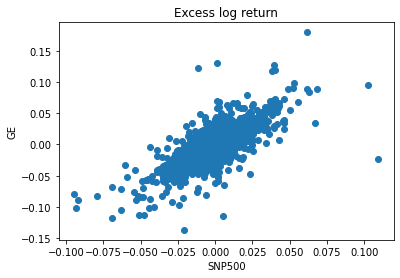

In [162]:
plt.scatter(excess_r_Mp["^GSPC"][excess_r_Mp["^GSPC"].columns[0]], 
            excess_r_Mj["GE"][excess_r_Mj["GE"].columns[0]])
plt.title("Excess log return")
plt.xlabel("SNP500")
plt.ylabel("GE")

### Linear Regression

#### Least Square ~ Max Likelihood:

In [185]:
def ls_lr(x, y):
    beta_hat = np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.matmul(np.transpose(x), y))
    y_hat = np.matmul(np.matmul(np.matmul(x, np.linalg.inv(np.matmul(np.transpose(x), x))), np.transpose(x)), y)
    residuals = y-y_hat
    return beta_hat, residuals

#### Testing

In [186]:
x = excess_r_Mp["^GSPC"].to_numpy()
y_2 = excess_r_Mj["GE"].to_numpy()
y = [excess_r_Mj["GE"].to_numpy(), excess_r_Mj["MSFT"].to_numpy()]
# print(x.shape)
# print(np.transpose(x).shape)
# print(np.matmul(np.transpose(x), x))
print(np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.matmul(np.transpose(x), y)))

print(np.matmul(x, np.linalg.inv(np.matmul(np.transpose(x), x))).shape)
print(np.matmul(np.matmul(x, np.linalg.inv(np.matmul(np.transpose(x), x))), np.transpose(x)).shape)
y_hat = np.matmul(np.matmul(np.matmul(x, np.linalg.inv(np.matmul(np.transpose(x), x))), np.transpose(x)), y)
print(y_hat.shape)
print(np.array(y).shape)
print(np.max(y-y_hat))

[[[1.18394351]]

 [[1.04515522]]]
(3372, 1)
(3372, 3372)
(2, 3372, 1)
(2, 3372, 1)
0.14300390001422336


In [187]:
ls_lr(excess_r_Mp["^GSPC"].to_numpy(),[excess_r_Mj["GE"].to_numpy(), excess_r_Mj["MSFT"].to_numpy()])

(array([[[1.18394351]],
 
        [[1.04515522]]]),
 array([[[ 0.00549615],
         [-0.00398426],
         [ 0.01217698],
         ...,
         [ 0.01006763],
         [-0.00603082],
         [ 0.00512604]],
 
        [[ 0.00650742],
         [ 0.0084882 ],
         [-0.03506374],
         ...,
         [ 0.00338665],
         [ 0.00046216],
         [ 0.01134339]]]))

In [188]:
ls_lr(excess_r_Mp["^GSPC"].to_numpy(), excess_r_Pj["Portfolio"].to_numpy())

(array([[1.03397223]]),
 array([[ 1.74663375e-03],
        [ 5.98268637e-03],
        [ 6.46847230e-05],
        ...,
        [ 8.00202156e-03],
        [-5.32852703e-04],
        [ 6.51600467e-03]]))

### Covariance and Correlation Matrix

In [189]:
def sigma_hat(x):
    # Assuming data in [Ticker, Sample, Value] format
    x = np.array(x)
    if len(x.shape) == 2:
        sx = np.swapaxes([x], 0, 1)
    else:
        sx = np.swapaxes(x, 0, 1)
    sam_size = sx.shape[0]
    x_delta = sx - np.mean(sx, axis=0)
    
    sig_hat = 1/(sam_size-1)*np.sum([np.matmul(cxd, np.transpose(cxd)) for cxd in x_delta], axis=0)
    
    return sig_hat
    
def ro_hat(x):
    sig_hat = sigma_hat(x)
    ro_hat = np.zeros(sig_hat.shape)
    for i in range(sig_hat.shape[0]):
        for j in range(sig_hat.shape[1]):
            ro_hat[i][j] = sig_hat[i][j]/(np.sqrt(sig_hat[i][i])*np.sqrt(sig_hat[j][j]))
            
    return ro_hat


#### Testing

In [190]:
a = np.ones((2,5,1))*3
a[0] = a[0]-1
a = np.swapaxes(a, 0, 1)
print(a.shape)
print(np.mean(a, axis=0))

a_ = a - np.mean(a, axis=0)
print((a_[0]).shape)
print(np.transpose(a_[0]).shape)
print(1/(5-1)*np.sum([np.matmul(ca, np.transpose(ca)) for ca in a_], axis = 0))
# for i in range(len(a)):
#     print(a[i] - np.mean(a, axis=0))

(5, 2, 1)
[[2.]
 [3.]]
(2, 1)
(1, 2)
[[0. 0.]
 [0. 0.]]


In [191]:
x_2 = excess_r_Mj["GE"].to_numpy()
x = [excess_r_Pj["Portfolio"].to_numpy(), excess_r_Mj["GE"].to_numpy(), excess_r_Mj["MSFT"].to_numpy(), excess_r_Mp["^GSPC"].to_numpy()]

print(sigma_hat(x))
print(ro_hat(x))

[[0.00027188 0.00032199 0.00020861 0.00018453]
 [0.00032199 0.00044171 0.00019964 0.00021129]
 [0.00020861 0.00019964 0.00043531 0.00018652]
 [0.00018453 0.00021129 0.00018652 0.00017847]]
[[1.         0.92914206 0.6063728  0.83770705]
 [0.92914206 1.         0.45528948 0.75252591]
 [0.6063728  0.45528948 1.         0.66918365]
 [0.83770705 0.75252591 0.66918365 1.        ]]


### YW Solver

#### Autocorrelations

In [65]:
def acor(x, lag=None):
    if lag == None:
        lag = len(x)//2
    x = x - np.mean(x)
    rs_full=np.correlate(x, x, "full")
    rs_mid = len(rs_full)//2
    rs = rs_full[rs_mid:rs_mid+lag]
    rs=rs/rs[0]
    
    return rs
    

In [69]:
print(acor(np.random.normal(size=16),11))

[ 1.          0.08169007 -0.11928914 -0.19089116  0.48319441  0.09570693
 -0.07671951 -0.31142154 -0.06839282 -0.12720035  0.03947922]


In [52]:
lag=10
a = np.random.normal(size=20)
v = a
rs_full=np.correlate(a, v,"full")
rs_mid = len(rs_full)//2
rs = rs_full[rs_mid:rs_mid+lag]
rs=rs/rs[0]
print(rs)

# Cross Correlations are faster on using scipy.signal.correlate using FFT

[ 1.          0.03628753 -0.1188518  -0.14075253  0.13418904  0.27101062
 -0.06590494 -0.01290768 -0.10466976  0.11607545]


#### Toeplitz Matrix

In [46]:
# Stand-in implementation for lack of scipy, real numbers only

def toeplitz_from_vector(x):
    toeplitz = []
    p = len(x)+1
    for i in range(1,p):
        a = np.array(x[:len(x)-i+1])
        b = np.flip(x[1:i])
        np.flip(x[:i])
        toeplitz.append(np.concatenate((b,a)))
    return np.array(toeplitz)
        

In [49]:
x = [1,2,3,4,5,6,7,8,9]
print(toeplitz_from_vector(x))

[[1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [2. 1. 2. 3. 4. 5. 6. 7. 8.]
 [3. 2. 1. 2. 3. 4. 5. 6. 7.]
 [4. 3. 2. 1. 2. 3. 4. 5. 6.]
 [5. 4. 3. 2. 1. 2. 3. 4. 5.]
 [6. 5. 4. 3. 2. 1. 2. 3. 4.]
 [7. 6. 5. 4. 3. 2. 1. 2. 3.]
 [8. 7. 6. 5. 4. 3. 2. 1. 2.]
 [9. 8. 7. 6. 5. 4. 3. 2. 1.]]


In [48]:
i = 7
x = [1,2,3,4,5,6,7,8]
a = np.array(x[:len(x)-i+1])
b = np.flip(x[1:i])
print(np.concatenate((b,a)))

[7 6 5 4 3 2 1 2]


In [4]:
!pip install scipy

# TO_DO: Fix scipy mac module not found issue 

#### Constructing Autocorrelation Matrix

In [81]:
x = np.random.normal(size=20)
p = 8

In [85]:
rs = acor(x, lag=p+1)

Rv = rs[:-1]
rv = rs[1:]
print(Rv)
print(rv)

[ 1.         -0.37033229  0.20092717 -0.31298704  0.22202811 -0.00294906
  0.00250472  0.03253089]
[-0.37033229  0.20092717 -0.31298704  0.22202811 -0.00294906  0.00250472
  0.03253089 -0.371797  ]


In [86]:
R = toeplitz_from_vector(Rv)
print(R)

[[ 1.         -0.37033229  0.20092717 -0.31298704  0.22202811 -0.00294906
   0.00250472  0.03253089]
 [-0.37033229  1.         -0.37033229  0.20092717 -0.31298704  0.22202811
  -0.00294906  0.00250472]
 [ 0.20092717 -0.37033229  1.         -0.37033229  0.20092717 -0.31298704
   0.22202811 -0.00294906]
 [-0.31298704  0.20092717 -0.37033229  1.         -0.37033229  0.20092717
  -0.31298704  0.22202811]
 [ 0.22202811 -0.31298704  0.20092717 -0.37033229  1.         -0.37033229
   0.20092717 -0.31298704]
 [-0.00294906  0.22202811 -0.31298704  0.20092717 -0.37033229  1.
  -0.37033229  0.20092717]
 [ 0.00250472 -0.00294906  0.22202811 -0.31298704  0.20092717 -0.37033229
   1.         -0.37033229]
 [ 0.03253089  0.00250472 -0.00294906  0.22202811 -0.31298704  0.20092717
  -0.37033229  1.        ]]


#### Fitting $\phi$

In [105]:
def ar_fit(x, lag):
    rs = acor(x, lag+1)
    R = toeplitz_from_vector(rs[:-1])
    rv = rs[1:]
    R_inv = np.linalg.inv(R)
    phi = np.matmul(R_inv, rv)
    return phi

In [98]:
x = np.random.normal(size=20)
p = 5

In [106]:
print(ar_fit(x,p))

[-0.43024108 -0.8212244  -0.26836486 -0.50752138 -0.11116597]


In [107]:
rs = acor(x, p+1)

In [108]:
R = toeplitz_from_vector(rs[:-1])
rv = rs[1:]
print(R)
print(rv)

[[ 1.         -0.24233257 -0.45455371  0.2997321  -0.17121517]
 [-0.24233257  1.         -0.24233257 -0.45455371  0.2997321 ]
 [-0.45455371 -0.24233257  1.         -0.24233257 -0.45455371]
 [ 0.2997321  -0.45455371 -0.24233257  1.         -0.24233257]
 [-0.17121517  0.2997321  -0.45455371 -0.24233257  1.        ]]
[-0.24233257 -0.45455371  0.2997321  -0.17121517 -0.03867428]


In [109]:
R_inv = np.linalg.inv(R)
print(R_inv)

[[1.93015372 0.73056207 1.54661991 0.34605393 0.89838065]
 [0.73056207 1.78852415 1.15488769 0.95773442 0.34605393]
 [1.54661991 1.15488769 2.96577744 1.15488769 1.54661991]
 [0.34605393 0.95773442 1.15488769 1.78852415 0.73056207]
 [0.89838065 0.34605393 1.54661991 0.73056207 1.93015372]]


In [110]:
phi = np.matmul(R_inv, rv)
print(phi)

[-0.43024108 -0.8212244  -0.26836486 -0.50752138 -0.11116597]


#### Fitting real data